#**Sales Forecasting Using ARIMA**
In this project, we are going to predict the future monthly sales of Perrin Freres Champagne.
###**Dataset: Perrin Freres Monthly Champagne Sales**
The [dataset](https://www.kaggle.com/datasets/galibce003/perrin-freres-monthly-champagne-sales) is collected from Kaggle, which is posted by [MD. Mehedi Hassan Galib](https://www.kaggle.com/galibce003). It has 2 columns and 107 rows, from which 2 rows contains unimportant data. We'll clean our dataset, later.

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib.pyplot
#!pip install pmdarima
#!pip install warning
#!pip install statsmodels

###**Import dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import warnings

###**Getting and preparing the dataset**

In [2]:
# Creating the dataframe
df = pd.read_csv("Perrin Freres monthly champagne sales millions.csv")
# Renaming the columns of the dataframe
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales', 'Month': 'Date'}, inplace=True)
# Dropping all the na values
df = df.dropna()
# Converting the Date values from Strings to Datetime Object
df['Date']=pd.to_datetime(df['Date'])
# Setting Date column as the index
df.set_index('Date', inplace=True)

In [3]:
df.head()

,Sales
Date,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


###**Plotting the data**

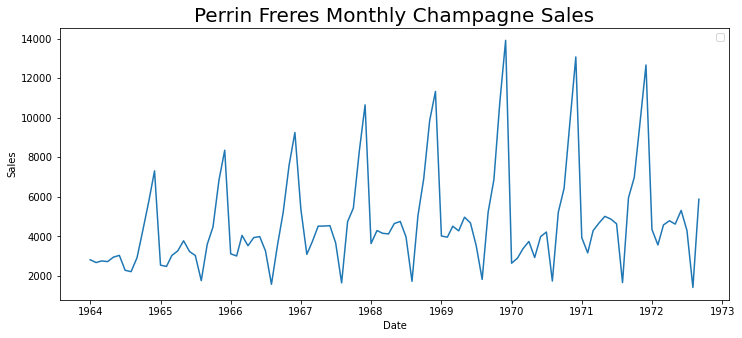

In [17]:
plt.plot(df["Sales"])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Perrin Freres Monthly Champagne Sales", fontsize=20)
plt.legend()
plt.show()

###**Dickey-Fuller Test to check for Stationarity**
We don't need to check for stationarity if we use `auto_arima`

In [18]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [19]:
adfuller_test(df["Sales"])

ADF Test Statistic : -1.8335930563276188
p-value : 0.363915771660247
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


###**Installing and Importing `PMDARIMA`**

In [20]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
warnings.filterwarnings("ignore")

In [22]:
# Finding the best parameters
stepwise_fit = auto_arima(df["Sales"], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1937.732, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1938.874, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1937.889, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1935.750, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.557 seconds


In [23]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -966.875
Date:                Sun, 28 Aug 2022   AIC                           1935.750
Time:                        00:30:57   BIC                           1938.394
Sample:                    01-01-1964   HQIC                          1936.821
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.895e+06   5.29e+05     13.025      0.000    5.86e+06    7.93e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               139.51
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               4.62   Skew:                            -1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###**Train Test Splitting**

In [24]:
train = df.iloc[:-30]
test = df.iloc[-30:]

###**Importing SARIMAX from `statsmodel`**

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

###**Training SARIMAX model on the train data**

In [26]:
# We get p,d,q from auto_arima and find seasonality in every 12 months of a year
model = SARIMAX(df['Sales'], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12)).fit(dis=-1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -761.331
Date:                            Sun, 28 Aug 2022   AIC                           1524.662
Time:                                    00:32:26   BIC                           1527.183
Sample:                                01-01-1964   HQIC                          1525.679
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.012e+05   7.79e+04     11.567      0.000    7.49e+05    1.05e+06
===================================================================================
Ljung-Box (L1) (Q):                  16.92   Jarque-Bera (JB):                63.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.71
Prob(H) (two-sided):                  0.55   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###**Predicting based on the trained model**

In [35]:
pred = model.predict(start=len(train), end=(len(train)+len(test)-1), typ='levels')

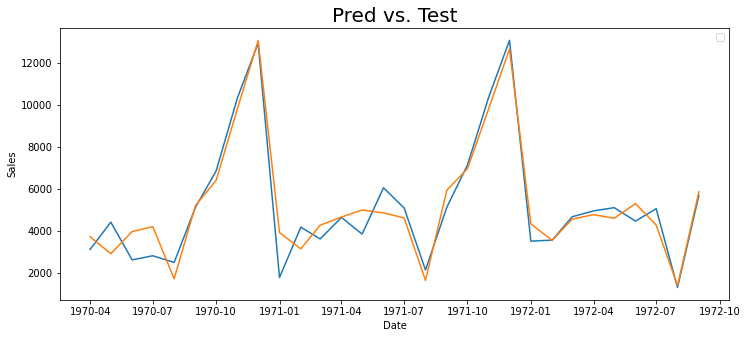

In [37]:
# Plotting the comparison between the prediction and the real test data
plt.plot(pred)
plt.plot(test["Sales"])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Pred vs. Test", fontsize=20)
plt.legend()
plt.show()

###**Predicting the future data using the same model**

In [38]:
future_pred = model.predict(start=(len(train)+len(test)-1), end=(len(train)+len(test)+10),typ='levels')

In [39]:
future_pred

1972-09-01     5705.0
1972-10-01     6907.0
1972-11-01     9777.0
1972-12-01    12596.0
1973-01-01     4274.0
1973-02-01     3490.0
1973-03-01     4503.0
1973-04-01     4714.0
1973-05-01     4544.0
1973-06-01     5238.0
1973-07-01     4224.0
1973-08-01     1339.0
Freq: MS, Name: predicted_mean, dtype: float64

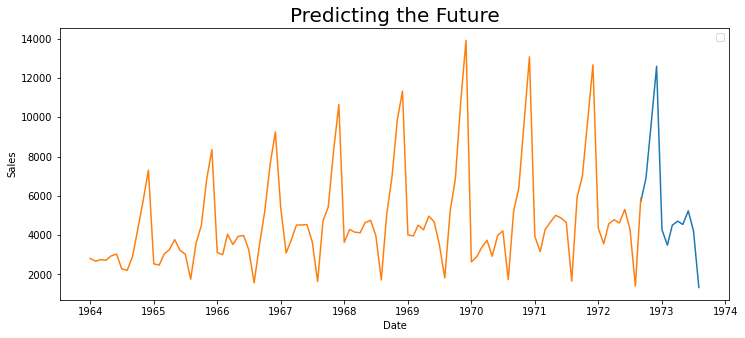

In [42]:
# Plotting the future sales
plt.plot(future_pred)
plt.plot(df["Sales"])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Predicting the Future", fontsize=20)
plt.legend()
plt.show()